# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, I will begin exploring the data through visualizations and code to understand how each feature is related to the others. I will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which I will track through the course of this project.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

Text(0.5,1,'The Annual Spending Distribution among Product Categories')

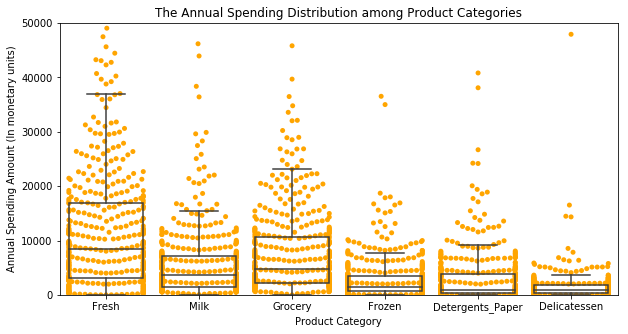

In [3]:
### A high level exploration on the distribution with boxplot

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.swarmplot(data=data, color='orange')
sns.boxplot(data=data, ax=ax, boxprops={'facecolor':'None', "zorder":10}, 
            zorder=25, showfliers=False)
plt.ylim([0, 50000])
plt.xlabel('Product Category')
plt.ylabel('Annual Spending Amount (In monetary units)')
plt.title('The Annual Spending Distribution among Product Categories')

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [4]:
# select three indices to sample from the dataset
# plant the seed for reproducibility
np.random.seed(123)
indices = np.random.choice(len(data), 3)

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   4692  6128     8025    1619              4515          3105
1  34454  7435     8469    2540              1711          2893
2  15881   713     3315    3703              1470           229

Text(69,0.5,'Customer Index')

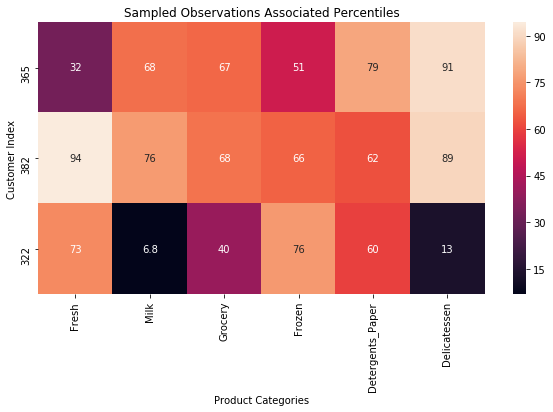

In [5]:
### A heatmap to visualize the percentiles of the sampled data points

# instantiate a DataFrame object in which contains observations' associated percentiles
ptiles_data = 100 * data.rank(pct=True)

# filter the sampled observations
ptiles_samples = ptiles_data.iloc[indices]

# visualize with heatplot
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ptiles_samples, annot=True)
plt.title('Sampled Observations Associated Percentiles')
plt.xlabel('Product Categories')
plt.ylabel('Customer Index')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

1. The first sampled customer with index `0` is likely a regular(Retail) grocery store/ supermarket. It is becasue the monetary units of most of the product categories are about the average of the whole dataset, except the ones of `Detergents_Paper` and `Delicatessen`. This sort of inventory/ stock level is not uncommon among regular grocery stores/ supermarkets which aim to cater to the people who live in the city and live a relatively hectic life. The level of `Delicatessen` is pretty self-explanatory. This customer might be located in a district where people tend to grab take-out or cooked food for the sake of convenience.

2. The second sampled customer with index `1` is likely a wet market or a wholesaler retailer. The numbers themselves are pretty self-explanatory, especially when looking at the one of `Fresh`. 34,454 is a number that is above 75 percent of its own kind. At the same time, this customer also spent relatively fair amount in other categories; so it could also be a wholesale retailer like Costco or Walmart.

3. The third sampled customer with index `3` is likely a restaurant/ cuisine which does not focus on dairy products, pastries or similar sorts. It spent 15,881 in `Fresh`, which is above average for that category. It spent only 713 in `Milk` and 229 in `Delicatessen`. One possible explanation of this sort of combination of spending is the customer tends to focus on getting `Fresh` materials/ ingredients to ensure the quality of the dishes.


To caveat, the summary above is based on a first glance. In other words, it is a very high-level and general interpretation of the data, not to mention the summary is solely based on only 3 sampled customers. This is far from a convincing conclusion. Further statistical inferences need to be performed to justify the establishments/ clustering. On top of that, we are not even sure if all the features are relevant in a sense of understanding the customers' segments.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

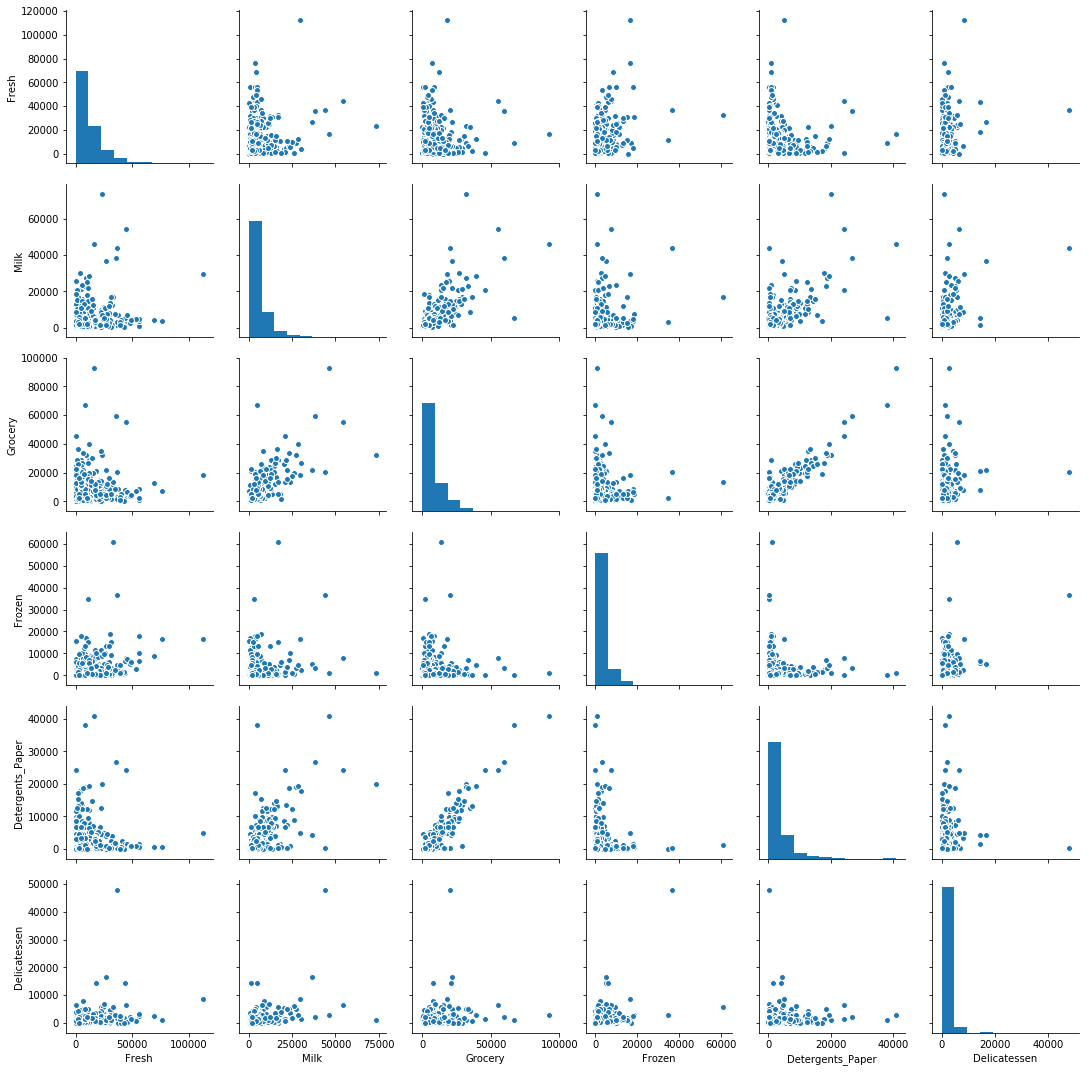

In [6]:
### A high level exploration on features from a bivariate perspective with pairplot

sns.pairplot(data=data)

From the plot above, it is hard to tell which feature seems irrelevant. But intuitively, `Detergents_Paper` may be a good one to drop because it is the only feature that is not directly associated with the idea of food; so let's see if other features will make good predictors for the spending level of `Detergents_Paper`.

In [7]:
# import packages for building estimators
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb

In [8]:
# make a copy of the DataFrame, using the 'drop' function to drop the given feature
# make a copy of the original 'data' DataFrame and drop a 
new_data = data.copy()
new_data = new_data.drop(['Detergents_Paper'], axis=1)

# set test size and a random state
test_size = 0.25
seed = 123

# create a decision tree regressor and fit it to the training set
# choice of random states can have a huge influence on the R^2-score obtained, 
# which could, in turn, have an influence on interpretation of the relevance of a feature
# mitigate this by averaging the prediction scores over 100 iterations

# instantiate a list for calculating average
score_list = []

# iterate 100 times
for i in range(100):
    # split the data into training and testing sets(0.25) using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], 
                                                    test_size=test_size)
    regressor = xgb.XGBRegressor(booster='gbtree', objective='reg:linear')
    regressor.fit(X_train, y_train)
    preds = regressor.predict(X_test)

    # report the score of the prediction using the testing set
    score = r2_score(y_test, preds)
    score_list.append(score)

# print the mean score
print("R2-Score (Detergents_Paper): {}".format(round(np.mean(score_list), 4)))

R2-Score (Detergents_Paper): 0.7933


I also wonder how well other features could explain the variance for each other.

In [9]:
### A loop to check the R2 score of all features

for col in data.columns:
    r2_list = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(data.drop([col], axis=1), data[col], 
                                                                      test_size=test_size) 
        reg = xgb.XGBRegressor(booster='gbtree', objective='reg:linear')
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)

        r2 = r2_score(y_test, predictions)
        r2_list.append(r2)
    print("R2-Score ({}): {}".format(col, round(np.mean(r2_list), 4)))

R2-Score (Fresh): -0.0014
R2-Score (Milk): 0.4595
R2-Score (Grocery): 0.8138
R2-Score (Frozen): -0.1303
R2-Score (Detergents_Paper): 0.7835
R2-Score (Delicatessen): -1.4098


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Answer:**


- I attempted to predict `Detergent_Paper`.


- The R2-score reported is about 0.79.


- `Detergents_Paper` may not be a good predictor for identifying customers' spending habits. With a R2-Score around 0.79, the regression model is doing fairly well with other features as predictor variables. In other words, these other features are explaining the variance of `Detergents_Paper` fairly well, which is another way of saying they are relevant to predicting customers' spending habits. This rationale is backed up by the R2-Score calculated by the loop above, in which the numbers suggest features like `Fresh`, `Frozen`, and `Delicatessen` are highly relevant predictors.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


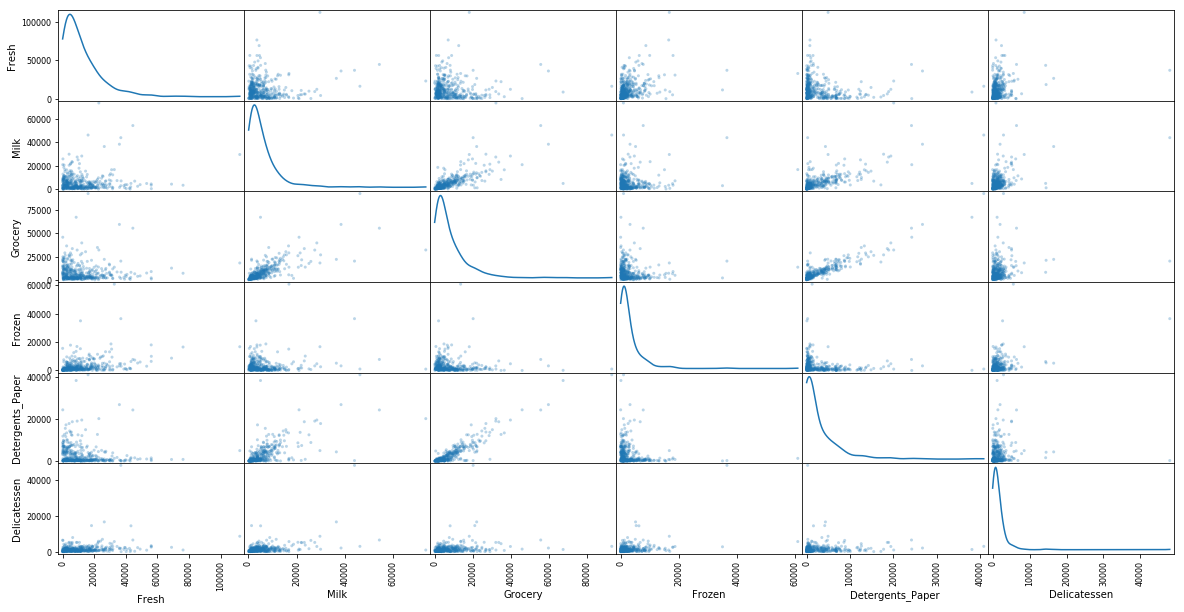

In [10]:
# produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,10), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

Text(0.5,1,'Product Category Covariance Matrix')

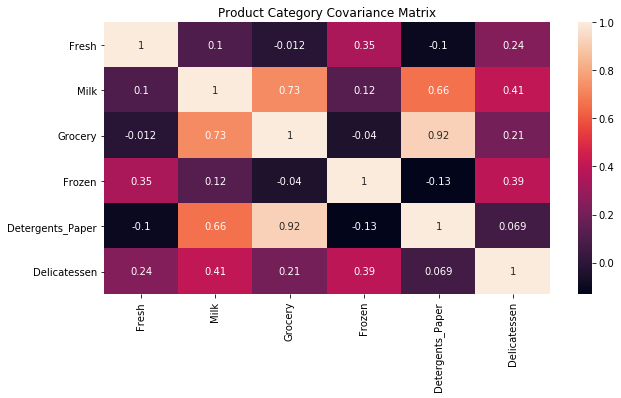

In [11]:
### A heatmap to visualize the covariance among product categories

features_corr = data.corr('pearson')

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(features_corr, annot=True)
plt.title('Product Category Covariance Matrix')

We can double check multicollinearity among features by calculating [Variance Inlfation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) with additional [statistical packages](https://etav.github.io/python/vif_factor_python.html). 


To clarify, VIF measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of multicollinearity. For example, a predictor variable with a VIF of 4 means that the standard error for the coefficient of that predictor variable is 2(√4=2) times as large as it would be if that predictor variable were uncorrelated with the other predictor variables.

In [12]:
# import packages for calculating VIFs
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


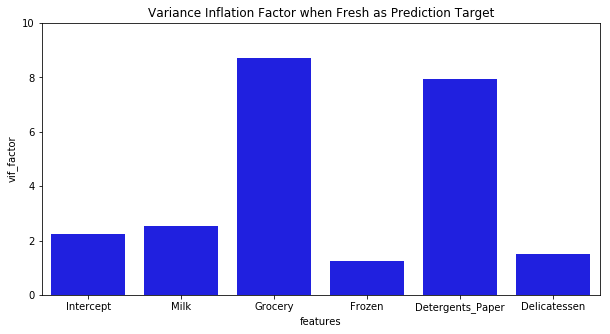

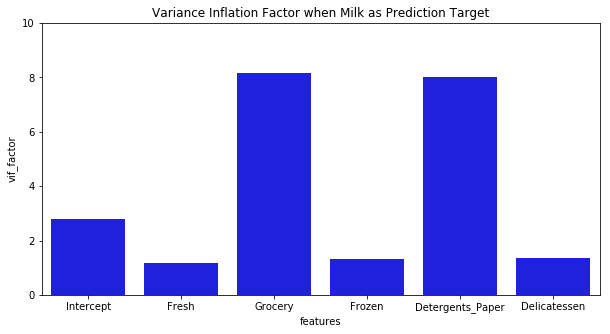

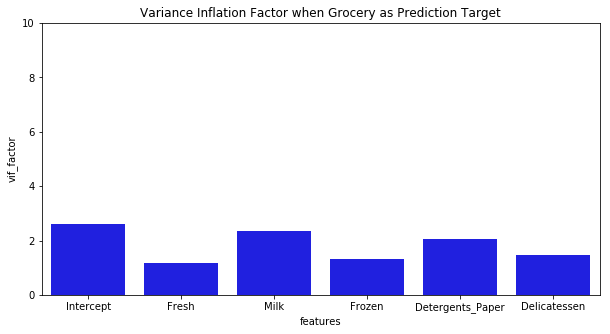

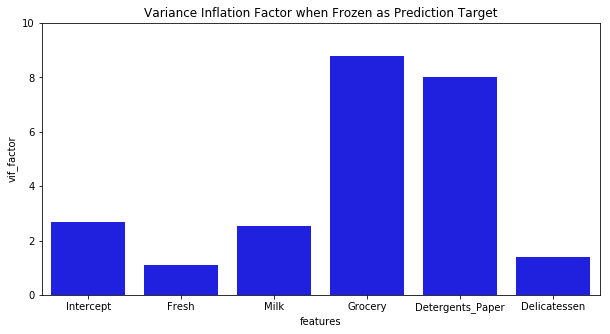

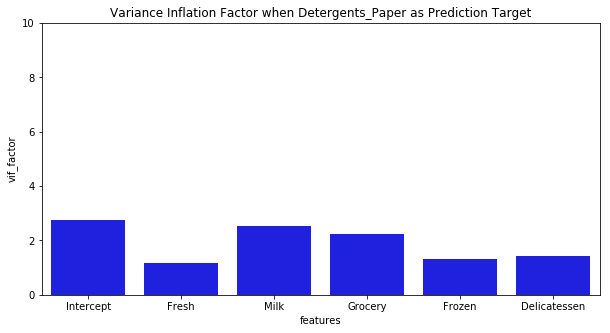

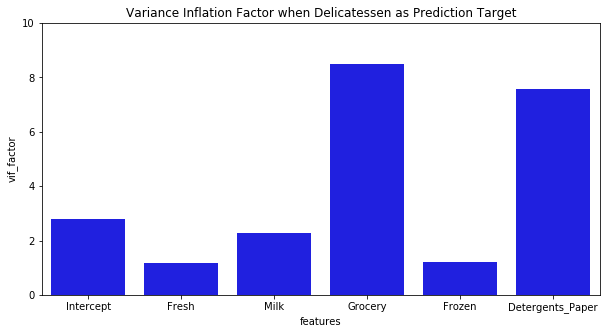

In [13]:
### A loop to visualize predictors' VIFs with different targets

for col in data.columns:
    
    # concatenate the feature components for the formula (Regression) used in dmatrices
    features = '+'.join(data.drop([col], axis=1).columns)
    
    # construct y and X DataFrames based on the regression formula:
    y, X = dmatrices(formula_like='data[col] ~' + features, 
                     data=data, return_type='dataframe')
    
    # for each X (Predictor), calculate VIF and save in DataFrame
    vif = pd.DataFrame()
    vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.barplot(x='features', y='vif_factor', data=vif, color='blue')
    plt.title('Variance Inflation Factor when {} as Prediction Target'.format(col))
    plt.ylim([0, 10])
    plt.show()

**Answer:**


- In general, the distributions for all product categories are skewed. This is justified by the presence of a long right tail (Right-skewed) in the histogram, in which the mean is 'pulled' by the outliers. We can easily spot the outliers from the boxplot created earlier. One possible explanation of this sort of distribution is the wholesale distributor mostly works with retail merchants, whose stock level does not vary by a large amount even if they are different establishments. Nonetheless, the distributor may have a few customers who are wholesalers just like herself and have large orders or a high stock level for different product categories.


- Multicollinearity does exist among features. From the heatmap above, we can see that there are positive correlations among certain predictors. Relatively strong positive correlations are spotted between `Grocery` and `Detergents_Paper` (0.92), `Grocery` and `Milk` (0.73), and `Detergents_Paper` and `Milk` (0.66). The presence of Multicollinearity is further justified by the Vairance Inflation Factor visualized with barplots, which suggest `Grocery` and `Detergents_Paper` are two predictors whose coefficient variance is inflated by a relatively large amount when making certain predictions.


- The evidence above further justifies `Detergents_Paper` may not be a relevant/ useful predictor. When `Detergents_Paper` serves as the target, the VIFs of other predictor variables are at a fairly moderate amount. But when switching the positions, `Detergents_Paper`'s VIF along with `Grocery`'s outgrow others. The expected relationships between predictors and target may not hold when multicollinearity is present. That is, we may have expected a positive relationship between the predictor variables and the target (based on the bivariate relationships), but in the multiple linear regression case, it may turn out the relationship is negative. On top of that, in case of hypothesis testing, the results may not be reliable because having correlated predictor variables means that the coefficient estimates are less stable. That is, standard deviations (often called standard errors) associated with our regression coefficients are quite large; therefore, a particular variable itself might be useful for predicting the target, but because of the relationship it possesses with other predictor variables, the association may no longer hold.


- The distributions of both `Detergents_Paper` and `Grocery` are right-skewed. That is, there are outliers who spent a fairly large amount in that product category.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


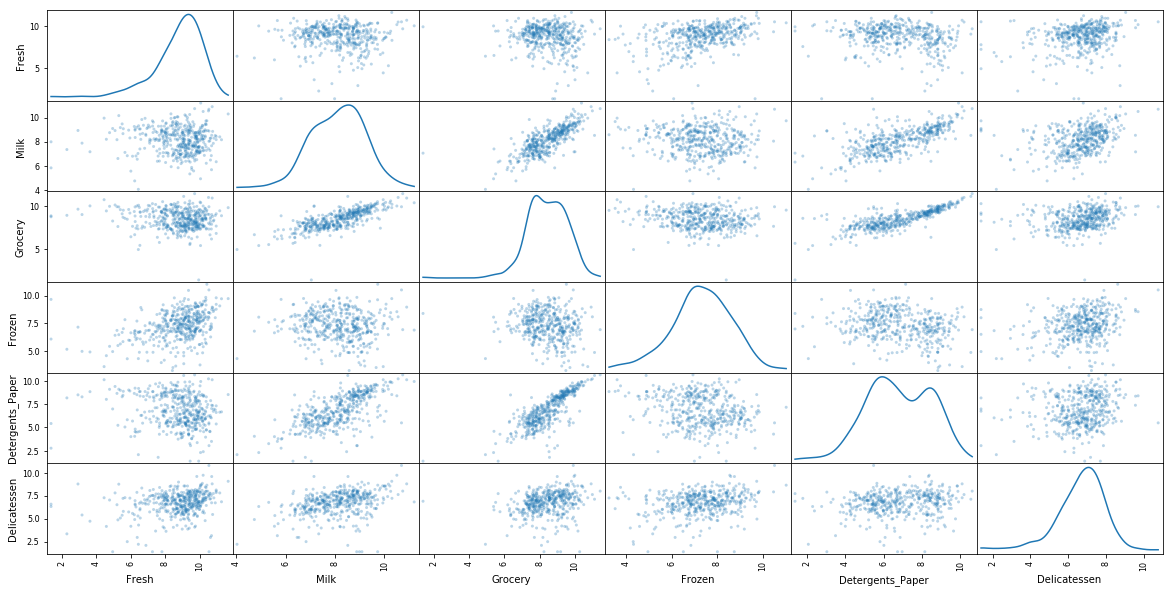

In [14]:
# scale the data using the natural logarithm
log_data = data.copy()
# translate the values by a small amount (+1) above 0 to make sure applying the the logarithm successfully
log_data = log_data.apply(lambda x: np.log(x + 1))

# scale the sample data using the natural logarithm
log_samples = samples.copy()
# translate the values by a small amount (+1) above 0 to make sure applying the the logarithm successfully
log_samples = log_samples.apply(lambda x: np.log(x + 1))

# produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (20,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.453827  8.720787  8.990442  7.390181          8.415382      8.041091
1  10.447409  8.914088  9.044286  7.840313          7.445418      7.970395
2   9.672942  6.570883  8.106515  8.217169          7.293698      5.438079

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [16]:
# import Counter for counting outliers' occurrences
from collections import Counter

# select the indices for data points you wish to remove
outliers = Counter()

# for each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # display the outliers
    print('The outlier step is {}'.format(step))
    print("Data points considered outliers for the feature '{}':".format(feature))
    features_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(features_outliers)
    
    for i in features_outliers.index:
        outliers[i] += 1

The outlier step is 2.5331169351084917
Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.454347   9.950371  10.732672  3.610918         10.095429      7.261225
66   2.302585   7.336286   8.911665  5.170484          8.151622      3.332205
81   5.393628   9.163354   9.575261  5.648974          8.964312      5.056246
95   1.386294   7.979681   8.740817  6.089045          5.411646      6.565265
96   3.178054   7.869784   9.001962  4.983607          8.262301      5.384495
128  4.948760   9.087947   8.249052  4.962845          6.968850      1.386294
171  5.303305  10.160569   9.894295  6.480045          9.079548      8.740497
193  5.198497   8.156510   9.918031  6.866933          8.633909      6.502790
218  2.944439   8.923325   9.629445  7.159292          8.475954      8.759826
304  5.087596   8.917445  10.117550  6.426488          9.374498      7.787797
305  5.497168   9.468079   9.088512  6.684612          8.271293      5.356586
338  1.386294   5.811141   8.856803  9.655154          2.772589      6.311735
353  4.770685   8.742734   9.961945  5.433722          9.069122      7.013915
355  5.252273   6.590301   7.607381  5.505332          5.220356      4.852030
357  3.637586   7.151485  10.011130  4.927254          8.817001      4.709530
412  4.584967   8.190354   9.425532  4.595120          7.996654      4.143135

The outlier step is 2.317478718786298
Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.040027  11.205027  10.377078  6.895683          9.907031      6.806829
98    6.222576   4.727388   6.658011  6.797940          4.043051      4.890349
154   6.434547   4.025352   4.927254  4.330733          2.079442      2.197225
356  10.029547   4.905275   5.389072  8.057694          2.302585      6.308098

The outlier step is 2.3983004342797924
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
154  6.434547  4.025352  4.927254  4.330733          2.079442      2.197225

The outlier step is 2.34772991822388
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.432071  9.663325   9.723763   3.526361          8.847504      6.073045
57    8.597482  9.203718   9.257987   3.663562          8.932345      7.156956
65    4.454347  9.950371  10.732672   3.610918         10.095429      7.261225
145  10.000614  9.034200  10.457171   3.761200          9.440817      8.396381
175   7.759614  8.967759   9.382191   3.970292          8.342125      7.437206
264   6.979145  9.177817   9.645105   4.127134          8.696343      7.143618
325  10.395681  9.728241   9.519808  11.016496          7.149132      8.632306
420   8.402231  8.569216   9.490091   3.258097          8.827468      7.239933
429   9.060447  7.467942   8.183397   3.871201          4.442651      7.824846
439   7.933080  7.437795   7.828436   4.189655          6.169611      3.970292

The outlier step is 4.083910254951247
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
161  9.428270  6.293419  5.648974  6.996681          1.386294      7.711549

The outlier step is 2.239434728134296
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.302585   7.336286   8.911665   5.170484          8.151622   
109   7.249215   9.724959  10.274603   6.513230          6.729824   
128   4.948760   9.087947   8.249052   4.962845          6.968850   
137   8.035279   8.997271   9.021961   6.495266          6.582025   
142  10.519673   8.875287   9.018453   8.005033          3.044522   
154   6.434547   4.025352   4.927254   4.330733          2.079442   
183  10.514557  10.690831   9.912001  10.506026          5.480639   
184   5.793014   6.823286   8.457655   4.317488          5.814131   
187   7.799343   8.987572   9.192176   8.743532          8.149024   
203   6.369901   6.530878   7.703910   6.152733          6.861711   
233   6.872128   8.514189   8.106816   6.843750          6.016157   
285  10.602989   6.463029   8.188967   6.949856          6.079933   
289  10.663990   5.659482   6.156979   7.236339          3.496508   
343   7.432484   8.848653  10.177970   7.284135          9.646658   

     Delicatessen  
66       3.332205  
109      1.386294  
128      1.386294  
137      3.610918  
142      1.386294  
154      2.197225  
183     10.777789  
184      2.484907  
187      1.386294  
203      2.944439  
233      2.079442  
285      2.944439  
289      3.135494  
343      3.637586

In [17]:
# the number of outliers based on Tukey Method
print('The number of outliers based on Tukey Method: {}'.format(len(outliers)))
print('The proportion of outliers in the entire dataset: {}%'.format(round((len(outliers)/len(data))*100, 4)))

# the 10 most frequent outliers across product categories
for i, k in list(outliers.most_common()[:10]):
    print('Customer {} has been an outlier in {} category(s).'.format(i, k))

The number of outliers based on Tukey Method: 42
The proportion of outliers in the entire dataset: 9.5455%
Customer 154 has been an outlier in 3 category(s).
Customer 65 has been an outlier in 2 category(s).
Customer 66 has been an outlier in 2 category(s).
Customer 128 has been an outlier in 2 category(s).
Customer 75 has been an outlier in 2 category(s).
Customer 81 has been an outlier in 1 category(s).
Customer 95 has been an outlier in 1 category(s).
Customer 96 has been an outlier in 1 category(s).
Customer 171 has been an outlier in 1 category(s).
Customer 193 has been an outlier in 1 category(s).


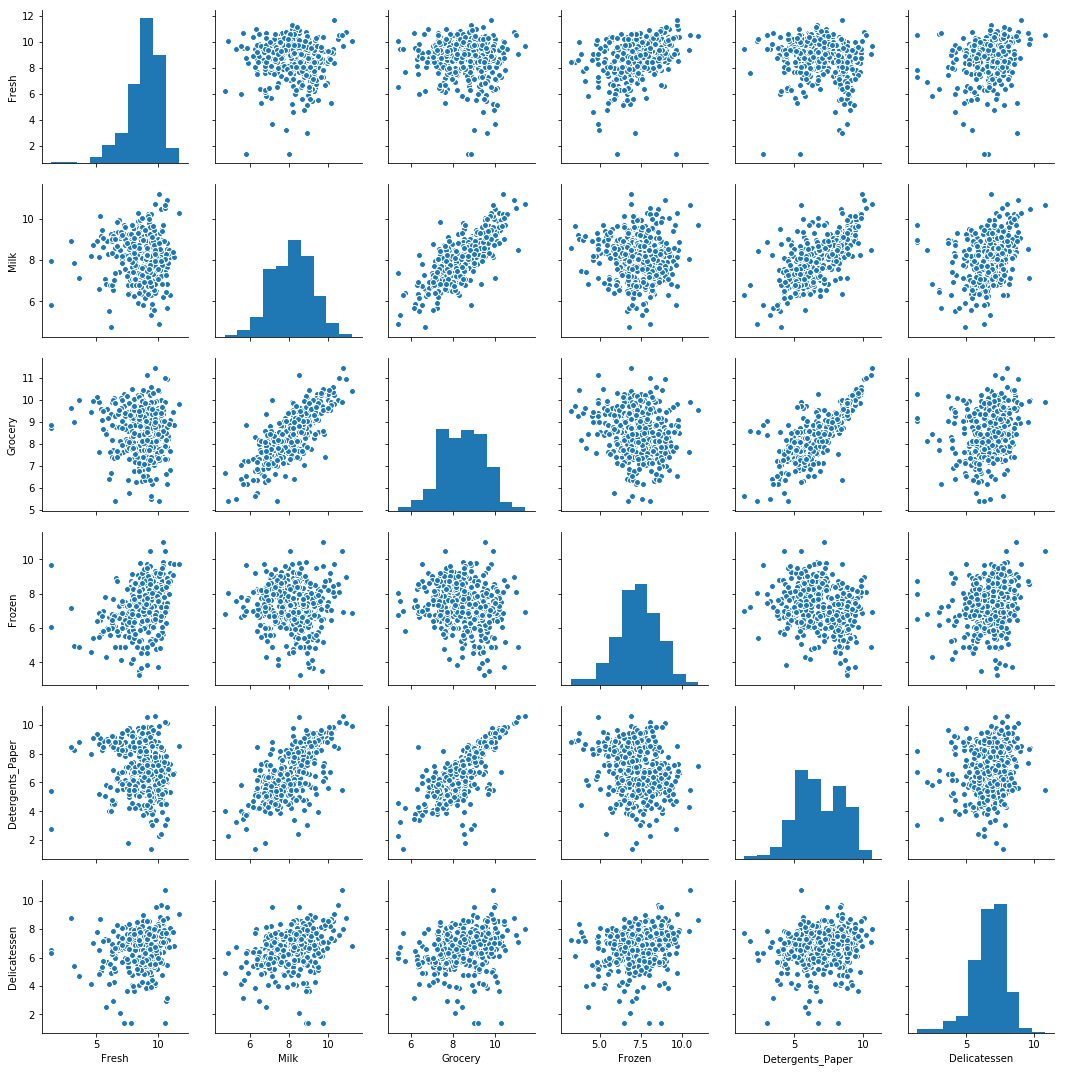

In [18]:
### Drop the customers who have been outliers more than once

# construct a to-drop list
to_drop = []

# loop over the counter object to screen occurrences
for i, k in list(outliers.most_common()):
    if k > 1:
        to_drop.append(i)
        
# remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[to_drop]).reset_index(drop = True)

# sanity check on the processed data
sns.pairplot(data=good_data)

In [19]:
### A comparison of the dropped outliers' numbers and overall statistics

display(log_data.iloc[to_drop])
display(log_data.describe())

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
154  6.434547  4.025352   4.927254  4.330733          2.079442      2.197225
65   4.454347  9.950371  10.732672  3.610918         10.095429      7.261225
66   2.302585  7.336286   8.911665  5.170484          8.151622      3.332205
128  4.948760  9.087947   8.249052  4.962845          6.968850      1.386294
75   9.923241  7.037028   1.386294  8.391176          1.386294      6.883463

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.732813    8.121615    8.442205    7.303128          6.791781   
std      1.470618    1.080635    1.111523    1.281888          1.709519   
min      1.386294    4.025352    1.386294    3.258097          1.386294   
25%      8.048378    7.335633    7.675081    6.611024          5.551989   
50%      9.048404    8.196435    8.467267    7.331043          6.706242   
75%      9.737123    8.880619    9.273948    8.176177          8.274596   
max     11.627610   11.205027   11.437997   11.016496         10.617123   

       Delicatessen  
count    440.000000  
mean       6.671094  
std        1.293960  
min        1.386294  
25%        6.014321  
50%        6.873680  
75%        7.507278  
max       10.777789

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

**Answer:** 


- There are data points that have been outliers for more than one feature. Customers with id 154, 65, 66, 128, and 75 have been outliers in at least two product categories.


- There are altogether 42 outliers detected based on the Tukey Method, and they make up about 9.5% of the entire dataset. From a statistical perspective, this is not a small amount, and removing this amount of data points may negatively impact further analysis as there may be important information loss. 


- Having said that, the reason why the five customers in the `to_drop` list are removed is because the magnitude of their spending seems fairly different to the rest of the dataset. A spending habit that does not resemble any specific/ or potential establishment suggests that the observation might be one of a kind. Put it in another way, the observation does not really fit in the current majority. This is a pretty good indicator to have the observation excluded from the dataset. On top of that, these potentially irrelevant observations could hurt certain clustering algorithms like k-means performance. Their anomalies may mislead k-means optimization process in which cluster centers may be drwan to incorrect direction.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4447  0.1688 -0.4027  -0.4396  0.1792   
Dimension 2              0.2638 -0.6841 -0.1699  -0.0734 -0.5051   
Dimension 3              0.1219 -0.6840  0.0439  -0.0176  0.3400   
Dimension 4              0.1007 -0.1864  0.0062   0.0541  0.7719   
Dimension 5              0.0484 -0.0028  0.7196   0.3511 -0.0310   
Dimension 6              0.0206  0.0280 -0.5378   0.8215  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7495       -0.1489  
Dimension 2           -0.0430       -0.4906  
Dimension 3           -0.2071        0.6094  
Dimension 4            0.2196       -0.5642  
Dimension 5           -0.5575       -0.2170  
Dimension 6           -0.1855        0.0194

PCA Dimension 1-2 cumulative explained variance:  0.7085
PCA Dimension 1-4 cumulative explained variance:  0.9311


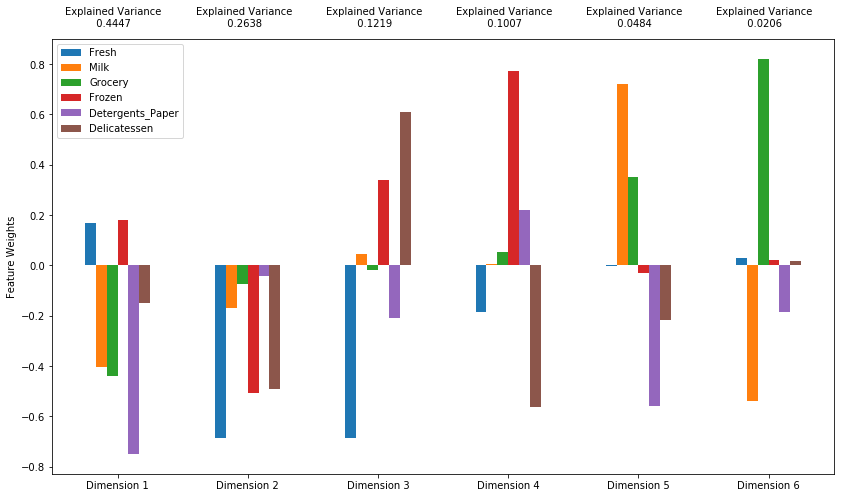

In [20]:
# import the class for performing PCA
from sklearn.decomposition import PCA

# apply PCA by fitting the good data with the same number of dimensions as features
n_components=6
pca = PCA(n_components=n_components, svd_solver='auto')
pca = pca.fit(good_data)

# transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# sanity check on constructed DataFrame on PCA results
display(pca_results)

# cumulative explained variance
print("PCA Dimension 1-2 cumulative explained variance: ", pca_results['Explained Variance'].cumsum()[1].round(4))
print("PCA Dimension 1-4 cumulative explained variance: ", pca_results['Explained Variance'].cumsum()[3].round(4))

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Answer:** 


- The cumulative explained variance for the first two principal components is 0.71.


- The cumulative explained variance for the first four principal components is 0.93.


- Different PCA components (Dimensions) represent different patterns of spending/ customer spending habits in which the change rate can be either positive or negative based on individual feature weights. In other words, PCA components are composite features projected by original features.
    1. The 1st principal component accounts for 44.47% of the variance. This component increases with decreasing `Detergents_Paper`, `Grocery`, and `Milk`, which are all negative-weighted features. This component can be viewed as a measure of customer spending in terms of spending tendency to not choosing the three product categories. In other words, this component can help differentiate customers who choose not to buy these product from the rest of the customers
    2. The 2nd principal component accounts for 26.38% of the variance. This component increases with decreasing `Fresh`, `Frozen`, and `Delicatessen`, which are all negative-weighted features. This component can be viewed as a measure of customer spending in terms of spending tendency to not choosing the three product categories. In other words, this component can help differentiate customers who choose not to buy these product from the rest of the customers
    3. The 3rd principal component accounts for 12.19% of the variance. This component increases with decreasing `Fresh`, a negative-weighted feature, and with increasing `Delicatessen` and `Frozen`, which are positive-weighted features. This component can help differentiate customers who choose not to buy `Fresh` but `Delicatessen` and `Frozen` from the rest of the customers
    4. The 4th principal component accounts for 10.07% of the variance. This component increases with increasing `Frozen` and `Detergents_Paper`, which are positive-weighted features, and with decreasing `Delicatessen` and `Fresh`, which are negative-weighted features. This component can help differentiate customers who choose not to buy `Delicatessen` and `Fresh` but `Frozen` and `Detergents_Paper` from the rest of the customers

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [21]:
# display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.9206      -0.6839       0.7376      -0.2627      -0.5788   
1      -0.8674      -2.2356      -0.3076      -0.4560       0.1158   
2       0.9162      -0.1803      -1.2478       1.3095      -1.2750   

   Dimension 6  
0      -0.1634  
1       0.0205  
2       0.4752

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [22]:
# apply PCA by fitting the good data with only two dimensions
n_components=2
pca = PCA(n_components=n_components, svd_solver='auto')
pca = pca.fit(good_data)

# transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [23]:
# display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.9206      -0.6839
1      -0.8674      -2.2356
2       0.9162      -0.1803

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

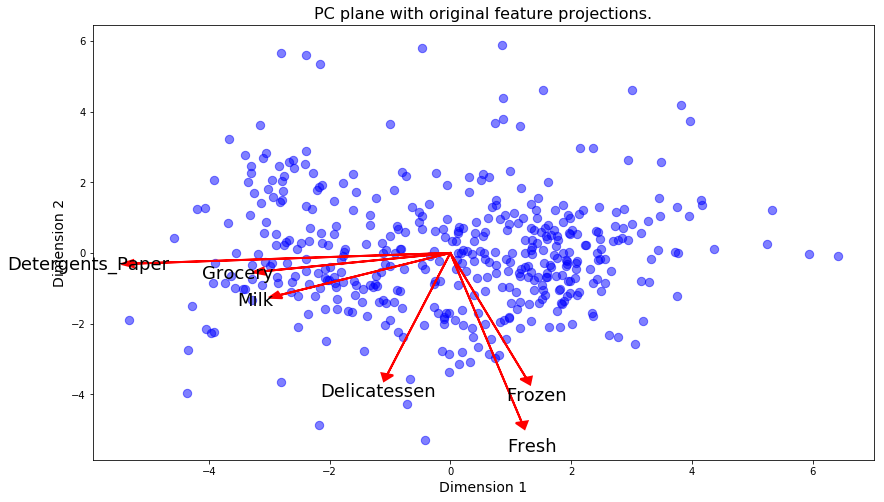

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Answer:** 


- K-Means is a hard clustering algorithm. That is, we are certain that particular data points belong to a particular cluster. Based on the least squares distance method, we will optimize the location of the centroid. It works by iteratively reassigning data points to clusters, and computing centroids based on the average of the point locations. The algorithm only calculates conventional Euclidean distance.
    - Advantages:
        1. Easy to understand and implement
        2. Running time
    - Disadvantages:
        1. Assumes clusters as spherical. That is, it does not work efficiently with complex geometrical shaped data, which is mostly non-linear
        2. Susceptible to outliers
        3. Sensitive to initialization. That is, results may not be reproducible and consistent
        4. Requires prior knowledge of data clusters/ segments


- Gaussian Mixture is a soft clustering algorithm. That is, we are uncertain about where the data points belong to. The algorithm uses probability of a sample to determine the feasibility of particular data points belonging to a cluster. The algorithm calculates “weighted” distance because it takes variance into consideration when searching the number of the cluster.
    - Advantages:
        1. Data points have probabilities of belonging to clusters; there is no definite assignment
        2. Does not assume clusters to be of any geometry; so it works well with non-linear geometric distributions
    - Disadvantages:
        1. Initialization of clusters could get difficult when dimensionality of data is high because the algorithm relies on more components
        2. Hard to interpret due to high complexity


- Based on the observation up until now, there has not been any solid evidence found to justify there is a clear-cut membership/ establishment in the data set; therefore, it makes sense to adopt the Gaussian Mixture model. Having said that, we could initialize Gaussian distributions by leveraging the clusters produced by the K-Means algorithm. In other words, the two algorithms are not necessarily mutually exclusive. In fact, mean initialization of the Gaussian Mixture algorithm in the scikit-learn library defaults to K-Means, which is specified in the `init_params` [parameter](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [25]:
# import additional packages for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# a function for evaluating K-means and GMM clustering
def clustering_eval(k, data):
    
    # instantiate the models and fit the data
    kmeans = KMeans(n_clusters=k).fit(data)
    gmm = GaussianMixture(n_components=k).fit(data)
    
    # predictions
    kmeans_preds = kmeans.predict(data)
    gmm_preds = gmm.predict(data)
    
    # Silhouette Coefficient is calculated using the mean intra-cluster distance 
    # and the mean nearest-cluster distance for each sample 
    # therefore, it makes sense to use the same distance metric here as the one used in the clustering algorithm
    # this is Euclidean for KMeans (default metric for Silhouette score) and Mahalanobis for general GMM
    kmeans_silhouette_avg = silhouette_score(data, kmeans_preds, metric='euclidean')
    gmm_silhouette_avg = silhouette_score(data, gmm_preds, metric='mahalanobis')
    
    # return the scores as a tuple
    return kmeans_silhouette_avg, gmm_silhouette_avg

In [26]:
# the range of number of cluster
possible_k_values = np.arange(2, 16)

# calculate silhouette score for all numbers of clusters
eval_per_k = [clustering_eval(k, reduced_data) for k in possible_k_values]

# print the results
for i, k in enumerate(possible_k_values):
    print('The Silhouette score when n_clusters is {}:'.format(k))
    print('K-Means: {}, GMM: {}'.format(round(eval_per_k[i][0], 4), round(eval_per_k[i][1], 4)))

The Silhouette score when n_clusters is 2:
K-Means: 0.4269, GMM: 0.3765
The Silhouette score when n_clusters is 3:
K-Means: 0.3966, GMM: 0.366
The Silhouette score when n_clusters is 4:
K-Means: 0.3318, GMM: 0.3014
The Silhouette score when n_clusters is 5:
K-Means: 0.3524, GMM: 0.1834
The Silhouette score when n_clusters is 6:
K-Means: 0.3626, GMM: 0.2633
The Silhouette score when n_clusters is 7:
K-Means: 0.3639, GMM: 0.3277
The Silhouette score when n_clusters is 8:
K-Means: 0.3524, GMM: 0.2945
The Silhouette score when n_clusters is 9:
K-Means: 0.3605, GMM: 0.2938
The Silhouette score when n_clusters is 10:
K-Means: 0.3609, GMM: 0.299
The Silhouette score when n_clusters is 11:
K-Means: 0.3588, GMM: 0.3253
The Silhouette score when n_clusters is 12:
K-Means: 0.3603, GMM: 0.3145
The Silhouette score when n_clusters is 13:
K-Means: 0.362, GMM: 0.3388
The Silhouette score when n_clusters is 14:
K-Means: 0.3567, GMM: 0.3317
The Silhouette score when n_clusters is 15:
K-Means: 0.3548, G

In [27]:
### Extra evaluation by calculating the information-theoretic criteria (BIC)
### http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
print(best_gmm)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


Text(0,0.5,'Silhouette Score')

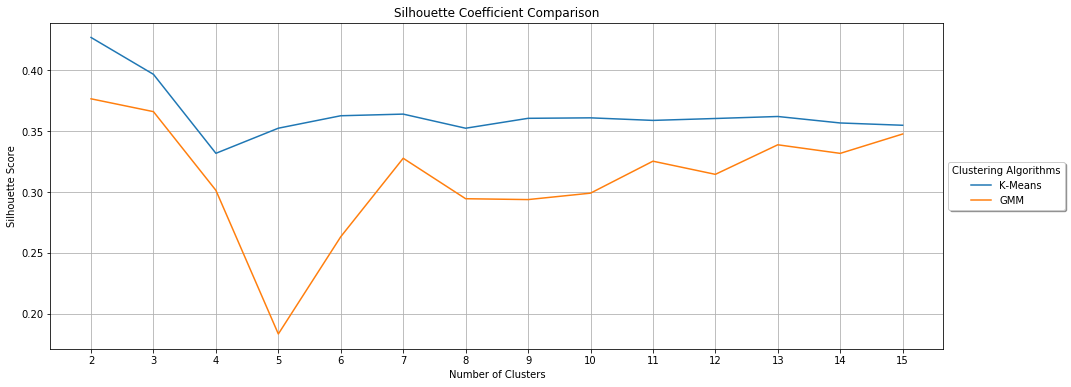

In [28]:
# plot the number of cluster and its associated silhouette score
fig, ax = plt.subplots(figsize=(16, 6))
km, gm = ax.plot(possible_k_values, eval_per_k)
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1)
ax.set_xticks(xticks, minor=False)
ax.xaxis.grid(True, which='both')
ax.yaxis.grid(True, which='both')
plt.legend((km, gm), 
           ('K-Means', 'GMM'),
           loc='center left', 
           title='Clustering Algorithms', 
           bbox_to_anchor=(1, 0.5), 
           fancybox=True, 
           shadow=True)
plt.title('Silhouette Coefficient Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [29]:
for n_clusters in np.arange(2, 16):
    
    # apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # find the cluster centers
    centers = clusterer.means_

    # predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    
    print("When n_components is {}, the silhouette_score is: {}".format(n_clusters, round(score, 4)))

When n_components is 2, the silhouette_score is: 0.3763
When n_components is 3, the silhouette_score is: 0.3384
When n_components is 4, the silhouette_score is: 0.3314
When n_components is 5, the silhouette_score is: 0.3302
When n_components is 6, the silhouette_score is: 0.2998
When n_components is 7, the silhouette_score is: 0.3255
When n_components is 8, the silhouette_score is: 0.299
When n_components is 9, the silhouette_score is: 0.2935
When n_components is 10, the silhouette_score is: 0.3031
When n_components is 11, the silhouette_score is: 0.2608
When n_components is 12, the silhouette_score is: 0.2815
When n_components is 13, the silhouette_score is: 0.3306
When n_components is 14, the silhouette_score is: 0.2859
When n_components is 15, the silhouette_score is: 0.3107


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**


- The numbers can be found above.


- The silhouette score seems to be the highest when the number of cluster is 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [30]:
# readjust the clusterer and associated objects
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

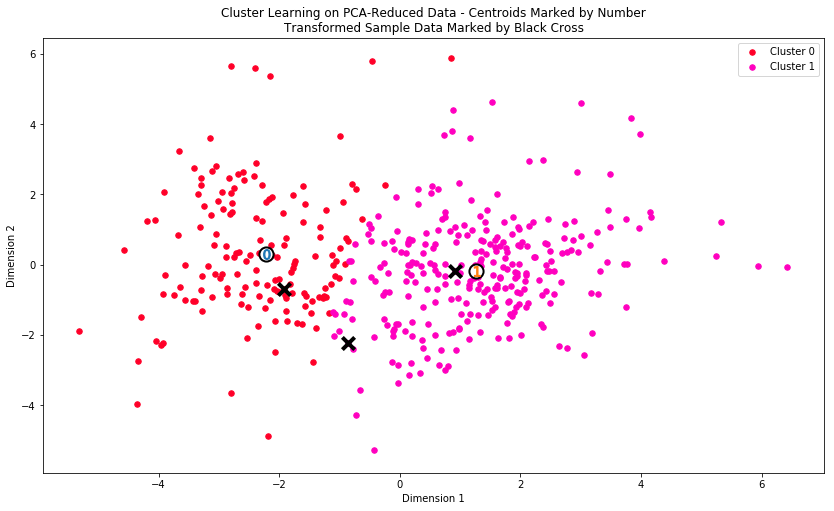

In [31]:
# display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [32]:
# inverse transform the centers
log_centers = pca.inverse_transform(centers)

# exponentiate the centers
true_centers = np.exp(log_centers)

# display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3604.0  7878.0  12261.0   878.0            4695.0         976.0
Segment 1  8937.0  2100.0   2747.0  2076.0             353.0         731.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

In [33]:
# clusters' deviation from median
print('Centroid deviation from median')
display(true_centers - data.median())

# clusters' deviation from mean
print('Centroid deviation from mean')
display(true_centers - data.mean())

Centroid deviation from median


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0 -4900.0  4251.0   7505.5  -648.0            3878.5          10.5
Segment 1   433.0 -1527.0  -2008.5   550.0            -463.5        -234.5

Centroid deviation from mean


Fresh         Milk      Grocery       Frozen  \
Segment 0 -8396.297727  2081.734091  4309.722727 -2193.931818   
Segment 1 -3063.297727 -3696.265909 -5204.277273  -995.931818   

           Detergents_Paper  Delicatessen  
Segment 0       1813.506818   -548.870455  
Segment 1      -2528.493182   -793.870455

**Answer:** 


- We will rely more on the median instead of the mean when referecing statistical description becasue mean is susceptible to outliers, which are not uncommon in the original data set. As shown in the DataFrames above, the results yielded by the mean reference are not as meaningful as the median's.


- Based of the median reference, `Segment 0` is characterized by `Milk`, `Grocery`, and `Detergents_Paper` as the numbers of centroid are all above the original data's median. This customer segment could represent establishments like regular gorcery stores/ supermarkets, or even wholesale retailers; `Segment 1` on the other hand is characterized by `Fresh` and `Frozen` as all numbers of the centroid are above the median of the original data's median. This customer segment could represent establishments like wet markets/ frozen food markets.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

In [34]:
# display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster (Segment)", pred)

Sample point 0 predicted to be in Cluster (Segment) 0
Sample point 1 predicted to be in Cluster (Segment) 1
Sample point 2 predicted to be in Cluster (Segment) 1


In [35]:
# sanity check on sampled data
display(samples)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   4692  6128     8025    1619              4515          3105
1  34454  7435     8469    2540              1711          2893
2  15881   713     3315    3703              1470           229

**Answer:** 


- The segments seem well cover the sampled customers.
    1. `Segment 0` best represents sampled customer 0
    2. `Segment 1` best represents sampled customer 1 and 2
    
    
- The predictions are consistent. Sampled customer 0 spent a large amount on `Grocery`, `Milk`, and `Detergents_Paper`; so it makes sense to cluster it under `Segment 0` which likely represents establishments like grocery stores. This is also consistent with my initial guess towards the sampled customer. Sampled customer 1 and 2 on the other hand spent a large amount on `Fresh`; therefore, it makes sense to cluster them under `Segment 1`. Though it is sort of arguable for sampled customer 1 because she also spent a fairly large amount on `Grocery` and `Milk`, which could make her seem like belonging to `Segment 0`. This customer is probably the black cross that lies inbetween.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Answer:** 


With identified types of customer segments, the wholesale distributor will be able to conduct meaningful hypothesis testing. As these customer segments are characterized by different features, it is likely they will react differently to the same change. From the standpoint of the wholesale distributor, she will want to hypothesize appropriately and  design different tests based on the characteristics of segments. These hypotheses will be tested on a subset of each segment separately to see if there are any statistically significant changes. The wholesale distributor will then decide whether or not she should fully roll out a new service. 


Having said that, we could still test different segments' reaction magnitude towards the same change. 


For example, a test setting could be:
- Randonly sample 2 groups (Control & Experiment) from each cluster (Segment)
    - Group 0A, 0B as the control group and the experiment group respectively for `Segment 0`
    - Group 1A, 1B as the control group and the experiment group respectively for `Segment 1`
- Change the delivery schedules for group 0B and 1B while the delivery schedules for 0A and 1A  reamin unchanged, assuming both control and experiment groups would react the same (The null hypothesis)
- Have some metrics to measure the test, for example:
    - Customer Satisfaction Score (CSAT)
    - Change in spending level
- Measure the changes/ differences between control & experiment group based on chosen metrics to see if they are statistically significant
- Refine delivery service/ distribution strategy accordingly based on test results

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Answer:**


The customer segments ("engineered features") itself could be fed as an input feature for a supervised algorithm. This can potentially enhance the model's performance when making predictions for customer segmentation.


We can frame the current setting as a supervised binary classification problem, in which the wholesale distributor trains a supervised model with labels obtained from clustering algorithms as the target variable (`Segment 0` & `Segment 1`). Together with customers' spending level across product categories, the classifier is trained to predict the customer segment for new customers. Once the segment is figured out, the wholesale distributor can suggest the most appropriate delivery service.


In a nutshell, the clustering algorithms perform feature extraction, which helps us find a representation for our data and we can feed that representation to other algorithms.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

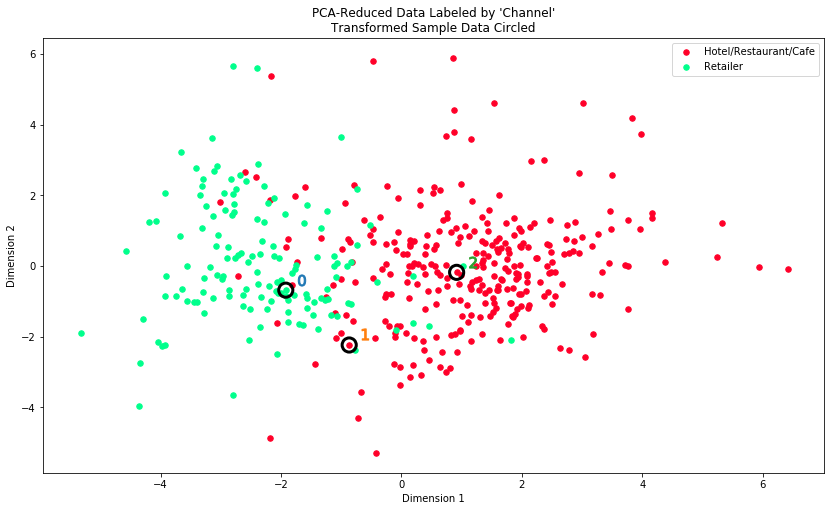

In [36]:
# display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, to_drop, pca_samples)

In [37]:
### Calculate the accuracy score for clustering

from sklearn.metrics import accuracy_score

channel_labels = pd.read_csv("customers.csv")["Channel"]

# subtracted 1 from channel_labels because the given channel_labels are 1 and 2, 
# while cluster-labels are 0 and 1
channel_labels = channel_labels.drop(channel_labels.index[to_drop]).reset_index(drop=True) - 1
channel_labels = abs(channel_labels - 1)

accuracy = accuracy_score(channel_labels, preds)

print(accuracy)

0.903448275862069


### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** 


- The number of clusters is consistent with this underlying distribution where two major clusters are identified; therefore, the chosen clustering algorithm generally performed well


- Although there are a handful of data points located in area where it is not the central gravity of its own cluster, most data points are clearly clustered with a tendency of leaning either to the left or to the right


- My guess on `Segment 0` as regular grocery stores/ supermarkets would fit into the category of `Retailer`. My guess on `Segment 1` as wet markets/ frozen food markets however would seem quite different from `Hotels/Restaurants/Cafes` in a sense of categorization